In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# matplot gallery 참고
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df_train['Age'].isnull().sum()

177

- 그냥 결측치를 채우면 안된다. 꼭 채워야 하는 것도 아니다. 
- 일단 이름의 호칭을 그룹핑 해서 나이 결측치를 채워보자

In [3]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]*)\.') # 정규표현식
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]*)\.') # 정규표현식


In [4]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [5]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

In [6]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


In [7]:
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

이렇게 호칭이라는 파생변수를 그룹핑하고 그 평균값으로 결측치를 넣어주는 것

<AxesSubplot:xlabel='Initial'>

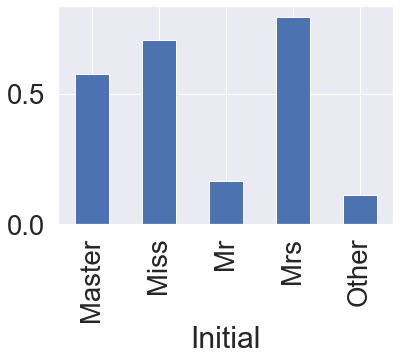

In [8]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

- train test set 합치기

In [9]:
df_all =pd.concat([df_train, df_test])

In [10]:
df_all.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mr
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [11]:
df_all.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,36.008195
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,42.667628
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,25.316303
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,50.686244
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,35.919231


In [20]:
(df_train['Age'].isnull() & (df_train['Initial']=='Mr'))

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [25]:
df_train.loc[(df_train['Age'].isnull() & (df_train['Initial']=='Mr')),"Age"] = 33
df_train.loc[(df_train['Age'].isnull() & (df_train['Initial']=='Mrs')),"Age"] = 37
df_train.loc[(df_train['Age'].isnull() & (df_train['Initial']=='Master')),"Age"] = 5
df_train.loc[(df_train['Age'].isnull() & (df_train['Initial']=='Miss')),"Age"] = 22
df_train.loc[(df_train['Age'].isnull() & (df_train['Initial']=='Other')),"Age"] = 45

df_test.loc[(df_test['Age'].isnull() & (df_test['Initial']=='Mr')),"Age"] = 33
df_test.loc[(df_test['Age'].isnull() & (df_test['Initial']=='Mrs')),"Age"] = 37
df_test.loc[(df_test['Age'].isnull() & (df_test['Initial']=='Master')),"Age"] = 5
df_test.loc[(df_test['Age'].isnull() & (df_test['Initial']=='Miss')),"Age"] = 22
df_test.loc[(df_test['Age'].isnull() & (df_test['Initial']=='Other')),"Age"] = 45



- Embarked 결측치 채우기

In [28]:
df_train['Embarked'].isnull().sum()

2

2개 밖에 없으니까 그냥 가장 많은 걸로 치환

In [29]:
df_train['Embarked'].fillna('S',inplace=True)

- age 카테고리 만들기\

continuous feature를 카테고리로 만들기, 정보손실이 일어날 수도 있지만 잘맞을수도있다

In [30]:
df_train['Age_cat'] = 0

In [31]:
def category_age(x):
    if x <10:
        return 0 
    elif x <20:
        return 1
    elif x < 30:
        return 2
    elif x <40:
        return 3
    elif x < 50:
        return 4
    elif x <60:
        return 5
    elif x < 70:
        return 6    
    else:
        return 7
 

In [33]:
df_train["Age_cat"] = df_train['Age'].apply(category_age) # apply함수가 lambda랑 똑같

In [34]:
df_test["Age_cat"] = df_test['Age'].apply(category_age)

In [35]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3


In [36]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,6
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2


In [37]:
df_train.drop(['Age'],axis=1,inplace=True)
df_test.drop(['Age'],axis=1,inplace=True)


- string 데이터를 수치데이터로 변환

map 사용

In [40]:
df_train['Initial'] = df_train['Initial'].map({'Master':0,'Miss':1,"Mr":2,"Mrs":3,"Other":4})

In [41]:
df_test['Initial'] = df_test['Initial'].map({'Master':0,'Miss':1,"Mr":2,"Mrs":3,"Other":4})

In [42]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [43]:
df_train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
df_train["Embarked"] = df_train["Embarked"].map({"C":0,"Q":1,"S":2})

In [45]:
df_test["Embarked"] = df_test["Embarked"].map({"C":0,"Q":1,"S":2})


In [48]:
df_train["Sex"] = df_train["Sex"].map({"female":0,"male":1})
df_test["Sex"] = df_test["Sex"].map({"female":0,"male":1})


- 상관관계 보기

In [53]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,0,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,13.0000,NaN,2,4,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,30.0000,B42,2,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,23.4500,NaN,2,1,2
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,30.0000,C148,0,2,2


In [54]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] +1

In [55]:
heatmap_data = df_train[["Survived","Pclass","Sex","Fare","Embarked","FamilySize","Initial","Age_cat"]]

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

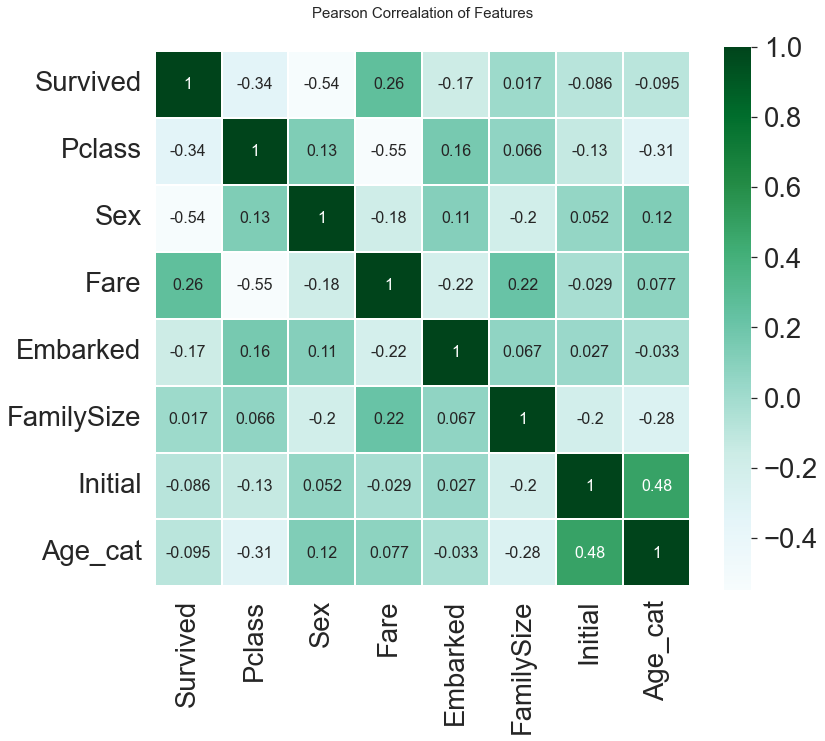

In [58]:
colormap = plt.cm.BuGn
plt.figure(figsize=(12,10))
plt.title("Pearson Correalation of Features", y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor="white",annot=True,annot_kws={'size':16}) #annot이 숫자보여주는거